# Your Name Here: 

In [ ]:
# This jupyter notebook is prepared by David Winfield

# A3 LogisticRegression, Multi-layer Perceptron (MLP)

## 1. Load data and perform general EDA (3+2+1+3+6 = 15pts)

### 1.1 import libraries: numpy, matplotlib.pyplot and pandas. (1+1+1 = 3pts)

You can import other libraries below as needed in any block.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### 1.2 import the data to a pandas dataframe and show the count of rows and columns (2pts)

In [3]:
# uncomment the following line if you are running this code in google colab and have uploaded the dataset to your drive
# from google.colab import drive
# drive.mount('/content/drive')

df = pd.read_csv('./Wine_Quality_Data.csv')
print("Number of rows:", len(df))
print("Number of columns:", len(df.columns))

Number of rows: 6497
Number of columns: 13


### 1.3 Show if any column has null values. (1pt)

In [4]:
null_counts = df.isnull().sum()

print("Number of null values in each column:\n", null_counts)

Number of null values in each column:
 fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64


### 1.4 We will use the 'quality' column as our target label. Print the count of each label in the dataset (in percentage). Mention which quality scores are among top 3 by their counts. (3pts)

In [6]:
quality_counts = df['quality'].value_counts()
quality_percentages = quality_counts / quality_counts.sum() * 100

print("Count of each label in the 'quality' column:")
print(quality_counts)
print("\nPercentage of each label in the 'quality' column:")
print(quality_percentages)

top_3 = quality_counts.sort_values(ascending=False).head(3)
print("\nTop 3 quality scores by their counts:")
print(top_3)


Count of each label in the 'quality' column:
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

Percentage of each label in the 'quality' column:
6    43.650916
5    32.907496
7    16.607665
4     3.324611
8     2.970602
3     0.461752
9     0.076959
Name: quality, dtype: float64

Top 3 quality scores by their counts:
6    2836
5    2138
7    1079
Name: quality, dtype: int64


### 1.5 Observe the correlation matrix for the columns. Name the pairs of columns with highest positive and highest negative correlations. (2+4 = 6pts) 

You can import and use seaborn here to visualize correlation matrix in a heatmap.

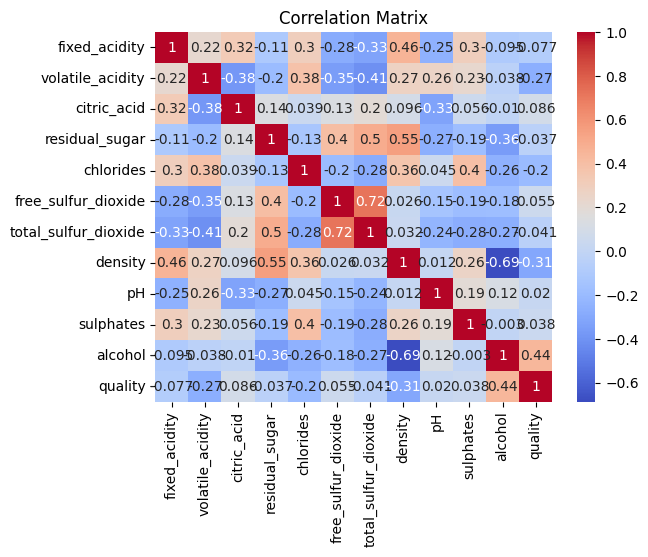

In [10]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## 2. Feature Selection and Preprocessing (2+2+3+3 = 10pts)

### 2.1 Drop the 'color' attribute from the dataframe. (2pts)

In [11]:
df = df.drop('color', axis=1)

print("Dataframe after dropping 'color' attribute:")
print(df.head())

Dataframe after dropping 'color' attribute:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5 

### 2.2 Assign the 'quality' column to target label y, and all other columns to attribute matrix X (1+1 = 2pts)

In [12]:
X = df.drop('quality', axis=1)
y = df['quality']

print("X (attribute matrix):")
print(X.head())
print("\ny (target label):")
print(y.head())

X (attribute matrix):
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  

### 2.3 Use scikitlearn's Standard Scaler to scale the feature matrix X. (3pts)

In [13]:
from sklearn.preprocessing import StandardScaler
X = df.drop('quality', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled feature matrix X:")
print(X_scaled[:5])

Scaled feature matrix X:
[[ 0.14247327  2.18883292 -2.19283252 -0.7447781   0.56995782 -1.10013986
  -1.44635852  1.03499282  1.81308951  0.19309677 -0.91546416]
 [ 0.45103572  3.28223494 -2.19283252 -0.59764007  1.1979747  -0.31132009
  -0.86246863  0.70148631 -0.11507303  0.99957862 -0.58006813]
 [ 0.45103572  2.55330026 -1.91755268 -0.66069923  1.02669737 -0.87476278
  -1.09248586  0.76818761  0.25811972  0.79795816 -0.58006813]
 [ 3.07381662 -0.36243847  1.66108525 -0.7447781   0.54141159 -0.76207424
  -0.98632406  1.10169412 -0.3638682   0.32751041 -0.58006813]
 [ 0.14247327  2.18883292 -2.19283252 -0.7447781   0.56995782 -1.10013986
  -1.44635852  1.03499282  1.81308951  0.19309677 -0.91546416]]


### 2.4 Split Dataset into Training and Test set. (3 pts)
Use 80:20 split for training and test. Also use stratified sampling to ensure balanced dataset.

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('quality', axis=1)
y = df['quality']

# perform 80:20 stratified split of X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 5197
Test set size: 1300


## 3. Logistic Regression from scratch (10+10+10+25+20 = 75pts)


In this section, you will write a logistic regression algorithm from scratch using python and numpy. You will first write some helper functions for transforming label encoding to one-hot encoding, for measuring the cross-entropy loss and predicting labels from test data. These functions will later be used in the logistic regression training and testing.   

### 3.1 The target label in our dataset is the 'quality' column. It consists of categorical values, label-encoded with 7 values in the range [3-9]. To perform a multiclass logistic regression, you need a function that takes a label matrix and converts it to One-hot encoded labels. (10pts)

Write the function below following the docstring. 

In [16]:
def onehot(y):
    """
    Converts an array of labels to one-hot encoding.

    Parameters:
    -----------
    y : numpy.ndarray
        An array of labels. It must have a shape of (n_samples, ).

    Returns:
    --------
    numpy.ndarray
        A matrix of one-hot encoding. It has a shape of (n_samples, n_classes).
    """
    
    n_samples = y.shape[0]
    n_classes = np.max(y) - np.min(y) + 1
    y_onehot = np.zeros((n_samples, n_classes))
    y_onehot[np.arange(n_samples), y - np.min(y)] = 1
    return y_onehot


### 3.2 For multi-class classification, you also need to measure cross-entropy loss. Cross-entropy loss is measured by the following formula:
$\text{Cross-Entropy Loss} = -\frac{1}{N} \sum_{i=1}^N \sum_{j=1}^n y_{ij} \log \hat{y}_{ij}$

Write a function that takes two matrices: one matrix of true labels $y_{ij}$, and one matrix of the predicted labels by your model $\hat{y}_{ij}$ (you are about to write the model function soon below), and returns the computed loss. **(10pts)**


In [17]:
def cross_entropy_loss(y_true, y_pred):
    """
    Computes the cross-entropy loss between the true labels and predicted labels.

    Parameters
    ----------
    y_true : numpy array
        Array of true labels with shape (m, n_classes).
    y_pred : numpy array
        Array of predicted labels with shape (m, n_classes).

    Returns
    -------
    float
        Cross-entropy loss between y_true and y_pred.

    Notes
    -----
    This function assumes that the labels are one-hot encoded.
    """
    
    epsilon = 1e-15
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + epsilon)) / m
    return loss

### 3.3 Write a function for softmax activation to compute probabilities from the linear score $z_i$. Softmax function uses the following formula:
$$\sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{k}e^{z_j}} , \text{for } i=1,2,3,...,k $$
where $z_i$ is the linear layer score for i-th input.   

**(10pts)**

In [18]:
def softmax(scores):
    """
    Compute the softmax of the given scores.

    Parameters:
    -----------
    scores : numpy.ndarray
        A 2D numpy array of shape (m, n), where m is the number of samples and n is the number of classes.

    Returns:
    --------
    probs : numpy.ndarray
        A 2D numpy array of shape (m, n) containing the probabilities of each sample belonging to each class.
    """
       
    exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return probs

### 3.4 Model development (20+5 = 25pts)

**3.4.1** Write a function for the logistic regression algorithm. You will use the functions you have written above in this module. Recall that with gradient descent optimization, the computation loop goes as:
For each epoch:
1. Compute $scores = X_{train} W + b$ 
2. Compute probability = softmax(scores)
3. Compute Cross-entropy Loss
4. Compute gradients of the loss with respect to the weights and bias.

    Partial derivative of Loss with respect to Weight matrix:
    $$\frac{\partial L}{\partial W} = -\frac{1}{m} X^T \left(y - \hat{y}\right)$$

    Partial derivative of Loss with respect to Bias matrix:
    $$\frac{\partial L}{\partial b_j} = -\frac{1}{m} \sum_{i=1}^m \left(y_{ij} - p_{ij}\right) $$

5. Update the weights and biases
    $$ W = W - (learning\ rate * weight\ gradient)  $$
    $$ b = b - (learning\ rate * weight\ gradient)  $$

**(20pts)**

In [20]:
def logistic_regression(X_train, y_train):
    """
    Performs logistic regression using softmax activation and gradient descent optimizer to classify the input data.

    Parameters:
    -----------
    X_train : numpy.ndarray
        The input training data of shape (num_samples, num_features).
    y_train : numpy.ndarray
        The training labels of shape (num_samples,).

    Returns:
    --------
    W : numpy.ndarray
        The learned weights of shape (num_features, num_classes).
    b : numpy.ndarray
        The learned bias of shape (1, num_classes).
    loss_list : list
        The list of loss values at each epoch during training.
    """

    # get the number of samples and features from X_train
    m, n = X_train.shape

    # convert training labels to one-hot encoded labels
    n_classes = np.max(y_train) - np.min(y_train) + 1
    y_train_onehot = np.zeros((m, n_classes))
    y_train_onehot[np.arange(m), y_train - np.min(y_train)] = 1

    # initialize the weights and bias with numpy arrays of zeros
    W = np.zeros((n, n_classes))
    b = np.zeros((1, n_classes))

    # set hyperparameters
    learning_rate = 0.1
    num_epochs = 1000

    # initialize a list to store the loss values
    loss_list = []

    # for loop over epochs
    for epoch in range(num_epochs):
        # compute the score (Z) for each class.
        scores = np.dot(X_train, W) + b

        # calculate the softmax probabilities
        probs = softmax(scores)

        # compute the cross-entropy loss
        loss = cross_entropy_loss(y_train_onehot, probs)
        loss_list.append(loss)

        # compute the gradients of the loss with respect to the weights and bias
        grad_weights = -np.dot(X_train.T, y_train_onehot - probs) / m
        grad_bias = -np.sum(y_train_onehot - probs, axis=0, keepdims=True) / m

        # update the weights and bias using the gradients and the learning rate
        W -= learning_rate * grad_weights
        b -= learning_rate * grad_bias

        # For tracking progress, print the loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: loss = {loss}")

    return W, b, loss_list

**3.4.2** Now that you have the model and the helper function, train the model with your prepared training dataset. Then plot the training loss curve. **(5pts)**

Epoch 0: loss = 1.9459101490553063
Epoch 100: loss = 1.1949517673006234
Epoch 200: loss = 1.1311795709802217
Epoch 300: loss = 1.10983461145127
Epoch 400: loss = 1.0989281540399647
Epoch 500: loss = 1.0921829018957439
Epoch 600: loss = 1.0875403203211738
Epoch 700: loss = 1.0841275422519896
Epoch 800: loss = 1.0815071173354567
Epoch 900: loss = 1.0794320915264553


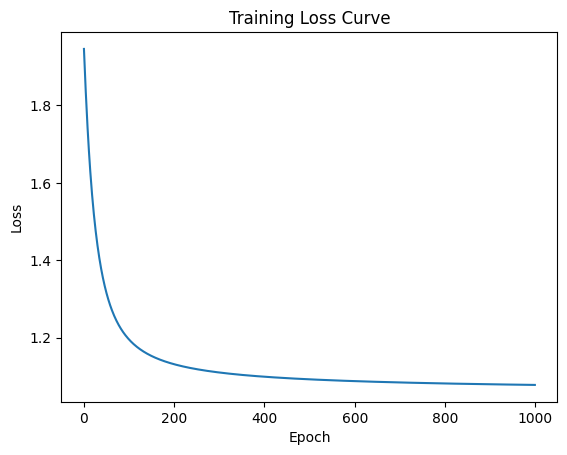

In [21]:
# Scale the feature matrix X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train the model
W, b, loss_list = logistic_regression(X_train_scaled, y_train)

# Plot the training loss curve
plt.plot(loss_list)
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### 3.5 Evaluation (10+1+4+3+2 = 20pts)

Write a function to predict the labels of X_test using the model trained above and return the predicted labels as categorical values similar to train labels. **(10pts)**

Note: By default, the predicted labels may return values within [0-6] instead of the original labels [3-9]. This can happen due to using argmax() to get label encoding from one-hot encoding when predicting test labels. You can add a simple offset to the argmax outputs of predicted labels to shift them to the range of [3-9]. This is important to note as you may see a very low accuracy even with a good model if true labels and predicted labels are not associated with the same categorical scale. 

In [22]:
def predict(X_test, W, b):
    '''
    X_test: a numpy array of testing features
    W: a numpy array of weights
    b: a numpy array of bias
    return: a numpy array of predicted labels as categorical values
    '''
    # compute the scores
    scores = np.dot(X_test, W) + b

    # compute the probabilities
    probs = softmax(scores)

    # get the predicted labels
    y_pred = np.argmax(probs, axis=1) + np.min(y_train)

    # return the predicted labels
    return y_pred


**3.5.1** import accuracy_score, confusion_matrix, precision_score, recall_score and f1_score from scikitlearn **(1pts)**

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


**3.5.2** Print the prediction scores on test data in terms of accuracy, precision and recall score. **(4pts)**

In [24]:
# Scale the feature matrix X_test
X_test_scaled = scaler.transform(X_test)

# Predict the labels of X_test
y_pred = predict(X_test_scaled, W, b)

# Compute the accuracy, precision, and recall scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print the scores
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 0.5377
Precision: 0.5382
Recall: 0.5377


c:\Users\drw12\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**3.5.3** Generate and visualize the confusion matrix. You can use seaborn heatmap to visualize a heatmap of the confusion matrix. **(3pts)**

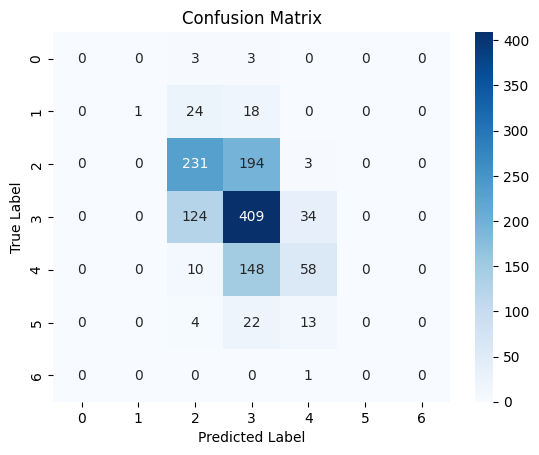

In [25]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**3.5.4** Which labels seem to be harder to classify for this model? **(2pts)**

Labels 2, 3, and 4 rank particularly high when it comes to classifying the model

###

## 4. Using Scikitlearn Logistic Regression (4+2+7+2 = 15pts)

### 4.1 Import LogisticRegressionCV module and create an instance of it. (4pts)
Use the following parameters:
1. 5-fold crossvalidation, 
2. lbfgs solver, 
3. run for 1000 iterations 
4. use 'multinomial' for choosing softmax classifier  

In [26]:
from sklearn.linear_model import LogisticRegressionCV

# Create an instance of LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, solver='lbfgs', max_iter=1000, multi_class='multinomial')


### 4.2 Train the model and predict the labels for test set. (2pts) 

In [27]:
# Fit the logistic regression model to the training data
clf.fit(X_train_scaled, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test_scaled)


c:\Users\drw12\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\drw12\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 4.3 Compute the accuracy, precision, recall and F1 scores. Also visualize the confusion matrix. (1+1+1+1+3 =7pts) 

Accuracy: 0.5346
Precision: 0.5351
Recall: 0.5346
F1 score: 0.5064


c:\Users\drw12\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


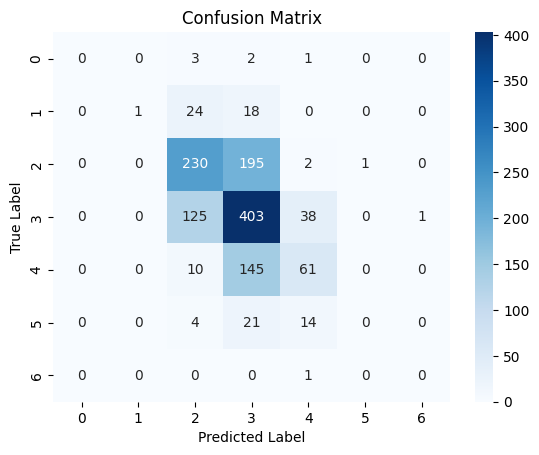

In [28]:
# Compute the accuracy, precision, recall, and F1 scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the scores
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 4.4 Did your previous model (built from scratch) and the model from scikitlearn library produced similar evaluation scores? (2pts)

Explain (in <100 words) the similarity and dissimilarity in score. What changed, what didn't, and why?

/ # TODO

The two models appeared to be almost the exact same in regards to score. There is a heavy cluster for labels 2, 3, and 4, with nearly identical heat scores

## 5. Using Scikitlearn Multi-layer Perceptron (16+19 = 35pts)

### 5.1 MLP with one hidden layer and stochastic gradient descent optimizer (4+2+1+7+2 = 16pts)

**5.1.1** Import MLPClassifier from scikitlearn's neural_network library. Then create a model instance of this classifier.

Use the following parameters: 
1. One hidden layer with 100 neurons, 
2. ReLu activation, 
3. Stochastic Gradient Descent solver
4. Learning rate = 0.01 (or you can continue to use your previous learning rate)
5. No of epoch = 1000

Also, set random_state to a fixed value so that your result is reproducible. **(4pts)** 

In [29]:
from sklearn.neural_network import MLPClassifier

# Create an instance of MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='sgd', learning_rate_init=0.01, max_iter=1000, random_state=42)


**5.1.2** Train the model with training set.
Then predict the labels for test set. **(2pts)**

In [30]:
# Fit the MLPClassifier model to the training data
clf.fit(X_train_scaled, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test_scaled)


**5.1.3** Plot the loss curve **(1pt)**

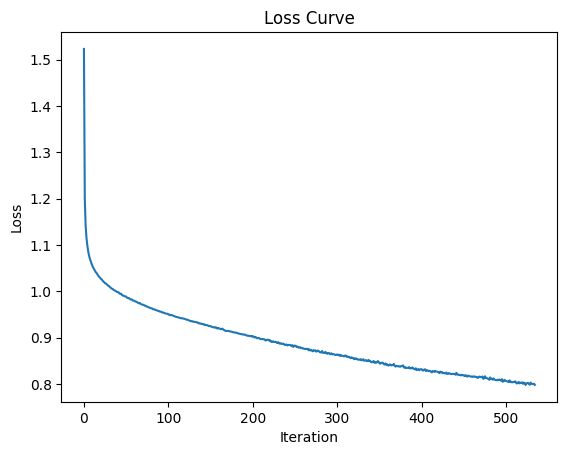

In [31]:
# Fit the MLPClassifier model to the training data
clf.fit(X_train_scaled, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test_scaled)

# Plot the loss curve
plt.plot(clf.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

**5.1.4** Print the accuracy, precision, recall and F1 scores. Also show the confusion matrix. **(1+1+1+1+3 = 7pts)**

Accuracy: 0.5677
Precision: 0.5637
Recall: 0.5677
F1 Score: 0.5537


c:\Users\drw12\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


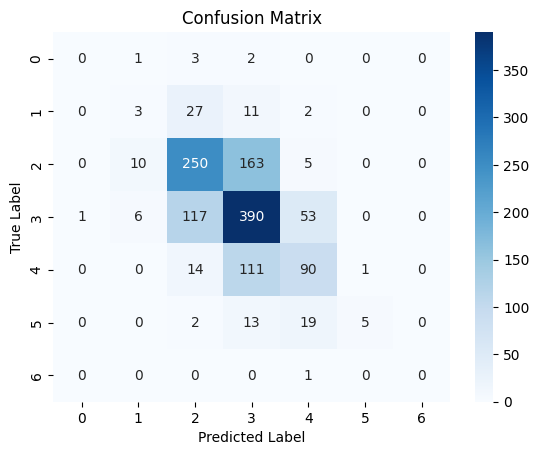

In [32]:
# Compute the accuracy score
acc = accuracy_score(y_test, y_pred)

# Compute the precision score
prec = precision_score(y_test, y_pred, average='weighted')

# Compute the recall score
rec = recall_score(y_test, y_pred, average='weighted')

# Compute the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the accuracy, precision, recall, and F1 scores
print(f'Accuracy: {acc:.4f}')
print(f'Precision: {prec:.4f}')
print(f'Recall: {rec:.4f}')
print(f'F1 Score: {f1:.4f}')

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**5.1.5** Did you see any change in scores after using the MLP classifier?

In <100 words, describe your observation. **(2pts)**

The scores still appear really similar to the first two confusion matrices. 2, 3, and 4 rank relatively high, but in this model they seem to be lower than they were in the previous two attempts

### 5.2 MLP with two hidden layer and adam optimizer (4+2+1+7+2+3 = 19pts)

**5.2.1** Import MLPClassifier from scikitlearn's neural_network library. Then create a model instance of this classifier.

Use the following parameters: 
1. **Two** hidden layers with 100 neurons, 
2. ReLu activation, 
3. Adam solver (this is an advanced optimizer which we did not cover in class. However the usage is quite straightforward)
4. Learning rate = 0.01 (or you can continue to use your previous learning rate)
5. No of epoch = 1000

Also, set random_state to a fixed value so that your result is reproducible. **(4pts)** 

(Refer to the scikitlearn documentation for clarification on the parameters)

In [33]:
# Create an instance of MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='adam',
                    learning_rate_init=0.01, max_iter=1000, random_state=42)


**5.2.2** Train the model with training set.
Then predict the labels for test set. **(2pts)**

In [34]:
# Train the model on the training set
mlp.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_mlp = mlp.predict(X_test_scaled)


**5.2.3** Plot the loss curve **(1pt)**

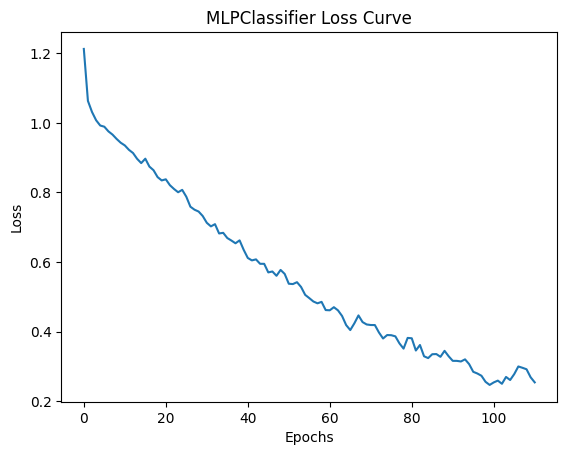

In [35]:
# Plot the loss curve
plt.plot(mlp.loss_curve_)
plt.title('MLPClassifier Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

**5.2.4** Print the accuracy, precision, recall and F1 scores. Also show the confusion matrix. **(1+1+1+1+3 = 7pts)**

Accuracy: 0.6038
Precision: 0.6064
Recall: 0.6038
F1 Score: 0.6012


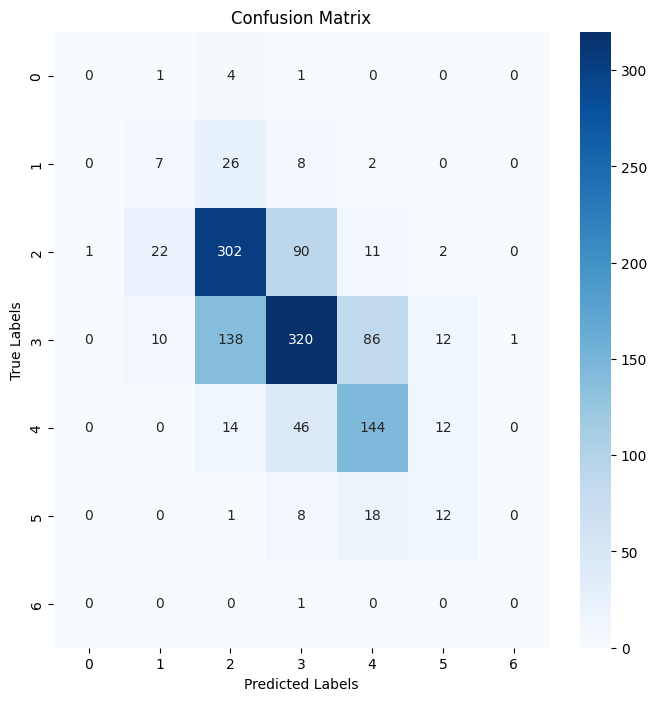

In [36]:
# Compute the evaluation metrics
accuracy = accuracy_score(y_test, y_pred_mlp)
precision = precision_score(y_test, y_pred_mlp, average='weighted')
recall = recall_score(y_test, y_pred_mlp, average='weighted')
f1 = f1_score(y_test, y_pred_mlp, average='weighted')

# Show the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Show the confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 8))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**5.2.5** Describe any difference in the loss curve from MLP with one hidden layer and MLP with two hidden layer. **(2pts)**

This time, labels 3 and 2 appeared to be almost identical in terms of heat. Also, 4 started to show up higher than it did previously

**5.2.6** Did you see any change in scores between the two MLP models?

In <100 words, describe your observation. **(3pts)**

This time, labels 3 and 2 appeared to be almost identical in terms of heat. Also, 4 started to show up higher than it did previously